In [15]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [18]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/dataset_new'):
    for filename in filenames:
        os.path.join(dirname, filename)
#from google.colab import drive
#drive.mount('/content/drive')

In [19]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install wrapt

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install scikit-learn

In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install tensorflow.keras

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [27]:
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [4]:
#!unzip "/content/dataset_new"

In [28]:
train_dir = "C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/dataset_new/train/"
test_dir = "C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/dataset_new/test/"

In [29]:
import os
os.chdir("C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/dataset_new")
#!ls

In [30]:
def load_images(directory_path):
    image_data = []
    image_labels = []

    for category in os.listdir(directory_path):

        for filename in tqdm(os.listdir(os.path.join(directory_path, category))):
            image_path = os.path.join(directory_path, category, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224,224))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_data.append(image)
            image_labels.append(category)
    image_data = np.array(image_data, dtype='float32')
    return image_data, image_labels

In [31]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [32]:
from ipywidgets import FloatProgress

In [33]:
pip install --upgrade jupyter

Note: you may need to restart the kernel to use updated packages.


In [34]:
import sys

sys.path.append('C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/dataset_new')

In [35]:
pip install image_utils

Note: you may need to restart the kernel to use updated packages.


In [36]:
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds

In [37]:
pip install tf-nightly

Note: you may need to restart the kernel to use updated packages.


In [38]:
from keras.preprocessing import image
import keras.utils as image

In [39]:
#EXTRA do not run
#import image_utils # or from image_utils import load_images
#X_train, y_train = image_utils.load_images(train_dir)
#X_test, y_test = image_utils.load_images(test_dir)

In [40]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

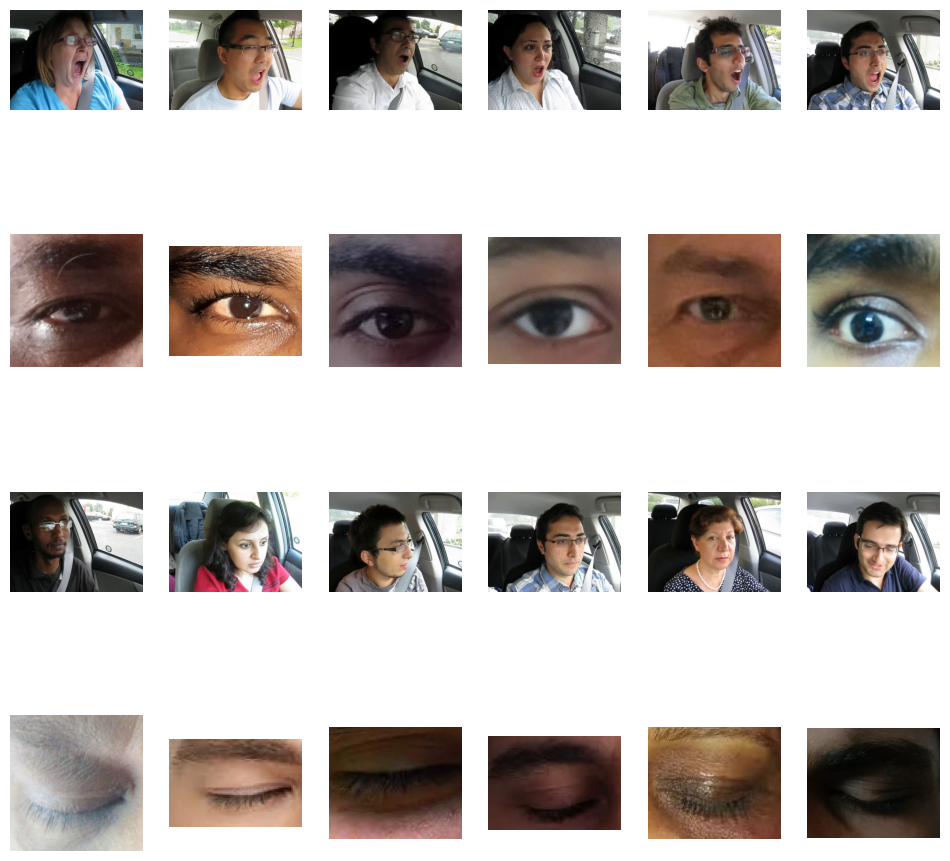

In [41]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_random_images(root_folder, num_images_per_category=6):
    categories = os.listdir(root_folder)
    random_images = []

    for category in categories:
        category_path = os.path.join(root_folder, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            if len(images) < num_images_per_category:
                print(f"Not enough images in category {category}")
                continue

            selected_images = random.sample(images, num_images_per_category)
            for image in selected_images:
                image_path = os.path.join(category_path, image)
                random_images.append(image_path)

    return random_images

def display_images(image_paths, rows=6, cols=6):
    if not image_paths:
        print("No images to display.")
        return

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

    for i in range(rows):
        for j in range(cols):
            if not image_paths:
                break
            image_path = image_paths.pop()
            img = mpimg.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

    plt.show()

# Set the path to your train folder
train_folder = "C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/dataset_new/train/"

# Get random images
random_images = get_random_images(train_folder)

# Display the random images in a 4x6 grid
display_images(random_images, rows=4, cols=6)


In [42]:
X_train = X_train / 255.
X_test = X_test / 255.

In [43]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
# TRAINING

In [45]:
cnn = Sequential()

#cnn.add(Conv2D(filters=8,kernel_size=2,activation='relu',input_shape=(224,224,3)))
#cnn.add(MaxPooling2D(pool_size=1))
cnn.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(MaxPooling2D(pool_size=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Dense(units=4,activation='softmax'))


In [46]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 32)       128       
 ormalization)                                                   
                                                        

In [47]:
from sklearn.metrics import f1_score

cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [48]:
pip install wrapt==1.14.1

Note: you may need to restart the kernel to use updated packages.


In [49]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
#checkpoint_filename = 'checkpoint/'
#model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

r = cnn.fit(x=X_train,
            y=y_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_test, y_test))
            #callbacks=[early_stopping, reduce_lr, model_checkpoint])



Epoch 1/30
78/78 [==============================] - 27s 326ms/step - loss: 0.6410 - accuracy: 0.7264 - val_loss: 4.9241 - val_accuracy: 0.2517
Epoch 2/30
78/78 [==============================] - 26s 330ms/step - loss: 0.4359 - accuracy: 0.7957 - val_loss: 6.5091 - val_accuracy: 0.2517
Epoch 3/30
78/78 [==============================] - 27s 340ms/step - loss: 0.3481 - accuracy: 0.8452 - val_loss: 6.5470 - val_accuracy: 0.2517
Epoch 4/30
78/78 [==============================] - 26s 339ms/step - loss: 0.2852 - accuracy: 0.8715 - val_loss: 4.1258 - val_accuracy: 0.3095
Epoch 5/30
78/78 [==============================] - 27s 341ms/step - loss: 0.2370 - accuracy: 0.8999 - val_loss: 2.2254 - val_accuracy: 0.4619
Epoch 6/30
78/78 [==============================] - 27s 341ms/step - loss: 0.1871 - accuracy: 0.9210 - val_loss: 2.3639 - val_accuracy: 0.3695
Epoch 7/30
78/78 [==============================] - 28s 360ms/step - loss: 0.1900 - accuracy: 0.9291 - val_loss: 0.5001 - val_accuracy: 0.7806

14/14 [==============================] - 1s 73ms/step
Test accuracy: 0.9468822170900693
F1 score: 0.9466287829894422


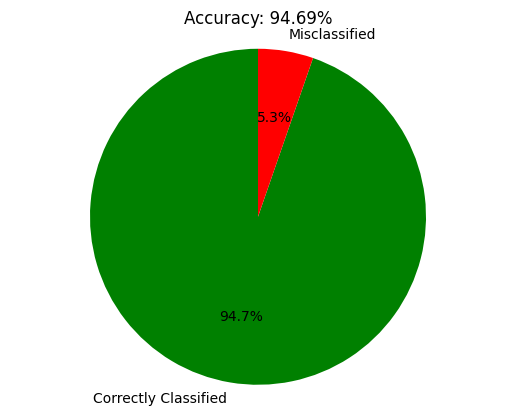

In [50]:
import numpy as np
from sklearn.metrics import f1_score

y_pred = cnn.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = np.argmax(y_test, axis=1)

test_accuracy = np.mean(y_pred_labels == y_true_labels)

f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print('Test accuracy:', test_accuracy)
print('F1 score:', f1)

labels = ['Correctly Classified', 'Misclassified']
sizes = [test_accuracy, 1 - test_accuracy]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Accuracy: {:.2f}%'.format(test_accuracy*100))
plt.show()



In [51]:
import matplotlib.pyplot as plt

def plot_loss_graph(train_loss, test_loss):
    fig = plt.figure(figsize=(5,5))

    plt.plot(train_loss, 'r', label='train loss')
    plt.plot(test_loss, 'b', label='test loss')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Graph')
    plt.legend()
    plt.show()

In [52]:
def plot_accuracy(history):
    plt.figure(figsize=(5,5))
    plt.plot(history.history['accuracy'], 'r', label='train accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label='test accuracy')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Graph')
    plt.legend()
    plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical


In [54]:
pred_X = cnn.predict(X_test)
y_pred = np.argmax(pred_X, axis = 1)
y_test = np.argmax(y_test, axis = 1)

14/14 [==============================] - 1s 65ms/step


Text(0.5, 1.0, 'CNN Confusion Matrix')

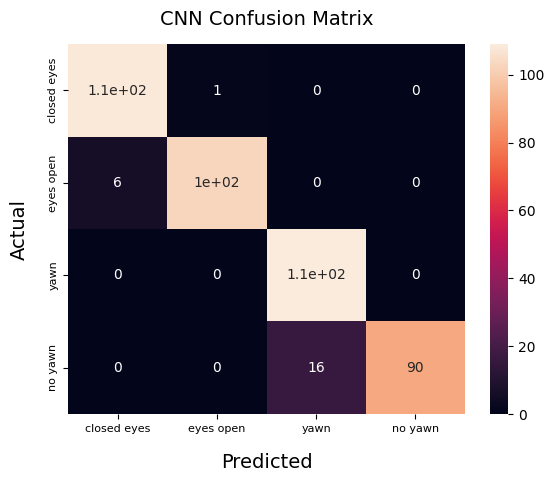

In [55]:
cm = confusion_matrix(y_test, y_pred)
hm = sns.heatmap(cm, annot = True)
hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
hm.xaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
hm.yaxis.set_ticklabels(['closed eyes', 'eyes open', 'yawn', 'no yawn'], fontsize = 8)
hm.set_title("CNN Confusion Matrix", fontsize = 14, pad = 14)

In [56]:
print(classification_report(y_test, y_pred, target_names = ['closed eyes', 'eyes open', 'yawn', 'no yawn']))

              precision    recall  f1-score   support

 closed eyes       0.95      0.99      0.97       109
   eyes open       0.99      0.94      0.97       109
        yawn       0.87      1.00      0.93       109
     no yawn       1.00      0.85      0.92       106

    accuracy                           0.95       433
   macro avg       0.95      0.95      0.95       433
weighted avg       0.95      0.95      0.95       433



In [57]:
!pip install visualkeras
import visualkeras

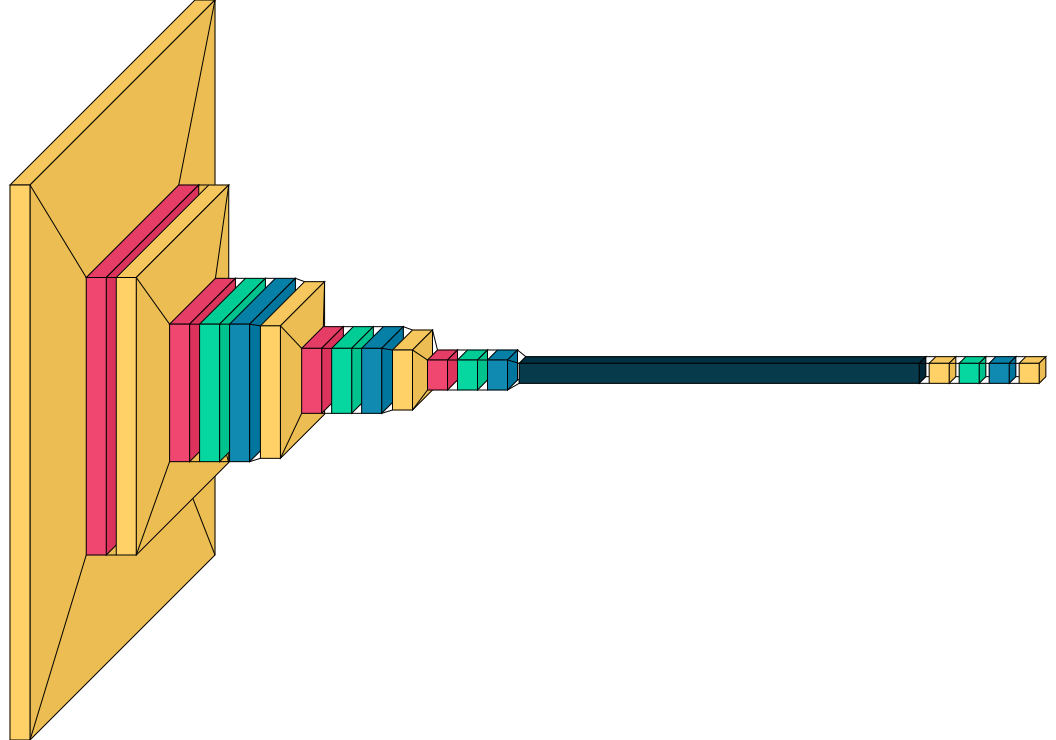

In [58]:
visualkeras.layered_view(cnn, legend=False, scale_xy=2.5)

In [59]:
pip install keras --upgrade


  Using cached keras-3.0.5-py3-none-any.whl.metadata (4.8 kB)
Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.0.5 which is incompatible.


In [60]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [62]:
from tensorflow.keras.utils import plot_model

from IPython.display import Image

plot_model(cnn, to_file='C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/cnnmodel.png', show_shapes=True, show_layer_names=True)
#Image("C:/Users/ankzb/OneDrive - Wilfrid Laurier University/Rajat-Project/cnnmodel1.png")

AttributeError: module 'pydot' has no attribute 'InvocationException'